In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df_full = pd.read_csv("jane-street-market-prediction/train.csv")

In [3]:
df_full

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390486,499,0.000000,0.000142,0.000142,0.005829,0.020342,0.015396,1,-1.649365,-1.169996,...,-1.896874,-1.260055,1.947725,-1.994399,-1.685163,-2.866165,-0.216130,-1.892048,0.901585,2390486
2390487,499,0.000000,0.000012,0.000012,-0.000935,-0.006326,-0.004718,1,2.432943,5.284504,...,-0.936553,1.064936,3.119762,-0.419796,-0.208975,-0.146749,0.730166,0.648452,2.068737,2390487
2390488,499,0.000000,0.000499,0.000499,0.007605,0.024907,0.016591,1,-0.622475,-0.963682,...,-2.956745,-0.640334,-2.279663,-0.950259,-4.388417,-1.669922,-3.288939,-1.336142,-2.814239,2390488
2390489,499,0.283405,-0.000156,-0.000156,-0.001375,-0.003702,-0.002004,-1,-1.463757,-1.107228,...,-2.035894,-1.780962,0.881246,-2.202140,-1.912601,-3.341684,-0.571188,-2.185795,0.627452,2390489


In [4]:
df = df_full.dropna()

In [5]:
df = df.drop(columns = ['ts_id', 'date', 'weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4'])

Principal components from ALL data: ts_id, date, feature_56, feature_59, feature_24, feature_113, weight, feature_50, feature_67, feature_64, feature_12

In [6]:
df

,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129
479,0.020704,1,0.086238,-1.370409,-0.796239,-0.344834,-1.152042,-0.504109,-2.402996,-1.680355,...,1.635075,0.759268,0.528743,-1.237860,1.610215,0.931161,2.236798,0.563850,1.023031,-0.635663
480,-0.019047,-1,2.540471,1.213258,-1.147064,-0.659254,-1.125747,-0.665765,-3.051758,-2.641164,...,4.213683,1.769695,3.047750,0.169149,3.513960,1.320900,3.726736,0.085196,3.322019,0.044636
481,-0.000713,1,-1.501931,-1.929721,-0.361945,-0.255800,-0.310175,-0.222479,-0.553447,-0.582370,...,-0.325481,2.948970,-0.463486,1.799423,-0.388679,2.653866,-0.716593,1.731266,-0.734133,1.272144
482,-0.005408,-1,-2.538125,-2.556376,0.801106,0.571915,-0.419473,-0.322196,1.090966,1.030251,...,0.122181,7.188442,-0.509257,3.463442,-0.083233,6.330656,-0.435629,4.287275,-0.594022,3.314273
483,-0.000294,-1,-2.425002,-2.544622,0.369648,0.150894,-0.293128,-0.172281,0.010301,-0.203682,...,0.685852,4.104185,0.616460,2.895219,0.441397,3.658603,0.552314,2.694183,0.781045,2.948364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390486,0.015396,1,-1.649365,-1.169996,-0.889129,-1.256179,-0.265419,-0.383478,0.526201,1.162469,...,-2.421753,-1.896874,-1.260055,1.947725,-1.994399,-1.685163,-2.866165,-0.216130,-1.892048,0.901585
2390487,-0.004718,1,2.432943,5.284504,-0.337469,-0.494263,-0.442409,-0.739016,-0.064645,0.163244,...,-0.677511,-0.936553,1.064936,3.119762,-0.419796,-0.208975,-0.146749,0.730166,0.648452,2.068737
2390488,0.016591,1,-0.622475,-0.963682,0.532835,0.392287,0.977046,0.819693,0.140248,0.039213,...,-0.459167,-2.956745,-0.640334,-2.279663,-0.950259,-4.388417,-1.669922,-3.288939,-1.336142,-2.814239
2390489,-0.002004,-1,-1.463757,-1.107228,-2.286985,-3.156451,-1.690676,-2.348199,-0.683812,-0.939522,...,-2.651236,-2.035894,-1.780962,0.881246,-2.202140,-1.912601,-3.341684,-0.571188,-2.185795,0.627452


## Start PCA

In [7]:
pca = sklearn.decomposition.PCA(n_components = 10, svd_solver='auto', random_state=None)

In [8]:
comps=pca.fit_transform(df)
pca_df = pd.DataFrame(data = comps, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'])
pca_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
0,20.240868,6.253149,-7.285101,1.067569,-1.022978,-9.311930,-5.845382,-4.147856,4.955074,1.660055
1,-1.636589,-9.672018,0.650020,13.368373,0.264129,-3.688679,0.393318,4.554825,7.644129,3.213275
2,-4.135411,3.159153,-4.354156,-5.317668,7.308355,0.227342,-5.201760,3.432060,9.706251,1.156995
3,-4.100465,-5.704051,-8.138589,-2.925344,-4.569740,1.900118,-6.752972,1.504914,9.041255,-2.263358
4,-2.885881,-6.004455,-2.644940,-1.439323,3.015440,0.328073,-7.162342,0.552611,11.538496,-2.623497
...,...,...,...,...,...,...,...,...,...,...
1993367,-4.798722,7.146225,3.466000,-7.014592,13.458319,3.644544,-4.459932,-2.818663,-3.429982,-5.948476
1993368,64.447372,7.790663,4.830522,-5.852463,14.554423,5.404704,4.756980,-14.362695,2.290804,6.766511
1993369,-3.292413,4.226955,-1.418384,-3.314907,0.767526,1.917892,5.281960,-1.077083,-8.181792,1.442555
1993370,-4.140290,0.372088,22.110516,-29.301717,2.868615,4.922276,1.955872,18.388963,-8.890265,2.940868


In [9]:
print(pca.explained_variance_ratio_)

[0.25218831 0.10851216 0.08846009 0.07933321 0.04717884 0.04362972
 0.03722718 0.03282606 0.03068573 0.02642281]


In [10]:
print(pca.singular_values_)

[21240.31586836 13932.77752691 12579.75545515 11913.1332359
  9186.96628575  8834.65772016  8160.72224928  7663.16003739
  7409.12208541  6875.24160917]


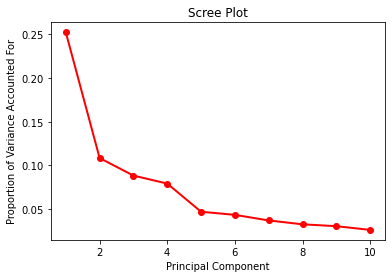

In [11]:
pc_vals = np.arange(pca.n_components_) + 1
plt.plot(pc_vals, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Accounted For')
plt.show()

In [43]:
print ("Proportion of Variance Accounted For : ", pca.explained_variance_ratio_)
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Accounted For :  [0.25218831 0.10851216 0.08846009 0.07933321 0.04717884 0.04362972
 0.03722718 0.03282606 0.03068573 0.02642281]
Cumulative Prop. Variance Explained:  [0.25218831 0.36070047 0.44916056 0.52849377 0.57567261 0.61930233
 0.65652951 0.68935558 0.72004131 0.74646412]


In [13]:
print(pca.explained_variance_)

[226.32566551  97.38392382  79.38825603  71.19735538  42.3405124
  39.15536899  33.40942937  29.45965491  27.53882247  23.71307056]


In [14]:
comp_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC 7', 'PC 8', 'PC 9', 'PC 10'], index=df.columns)
comp_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC 7,PC 8,PC 9,PC 10
resp,0.000018,-0.000052,0.000048,0.000041,-0.000059,-0.000028,0.000061,0.000093,0.000013,-0.000066
feature_0,-0.000176,0.085195,-0.007268,-0.010892,0.000168,0.000547,-0.004249,-0.035368,0.006005,-0.005040
feature_1,0.016943,0.031803,0.084512,0.188253,-0.045978,0.006715,-0.013836,0.005913,-0.039495,-0.049855
feature_2,0.012329,0.023993,0.063155,0.152856,-0.038994,0.069609,-0.084910,0.006642,-0.090471,-0.023935
feature_3,0.001286,-0.000242,0.009764,0.022880,-0.016524,0.022104,-0.025958,0.029255,-0.030979,-0.160786
...,...,...,...,...,...,...,...,...,...,...
feature_125,0.011856,0.000577,-0.017381,0.008516,-0.052372,0.011299,-0.145644,0.045484,0.173328,-0.014247
feature_126,0.025588,0.027329,0.046749,0.203105,-0.088542,-0.118032,0.103306,0.003031,0.162274,0.018589
feature_127,0.010812,0.000944,-0.003209,0.004918,-0.042147,0.010792,-0.115434,0.036395,0.137099,-0.021410
feature_128,0.023951,0.025204,0.048669,0.182326,-0.081188,-0.099375,0.086712,0.004892,0.150651,0.009925


In [15]:
n_pcs= pca.components_.shape[0]

In [16]:
best_vars = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

In [17]:
columns = df.columns.values.tolist()

In [18]:
best_var_names = [columns[best_vars[i]] for i in range(n_pcs)]

In [19]:
dic = {'PC{}'.format(i+1): best_var_names[i] for i in range(n_pcs)}

In [20]:
pc_df = pd.DataFrame(sorted(dic.items()))
pc_df

,0,1
0,PC1,feature_56
1,PC10,feature_12
2,PC2,feature_24
3,PC3,feature_113
4,PC4,feature_126
5,PC5,feature_50
6,PC6,feature_56
7,PC7,feature_56
8,PC8,feature_77
9,PC9,feature_64


## Start GEE

In [21]:
features = ['feature_'+str(i) for i in range(130)]

In [38]:
fam = sm.families.Poisson()
ind = sm.cov_struct.Exchangeable()
mod = smf.gee('resp ~ feature_56 + feature_24 + feature_113 + feature_126 + feature_77 + feature_64 + feature_12', 'date', df_full, cov_struct=ind, family=fam)
res = mod.fit()
print(res.summary())

                               GEE Regression Results                              
Dep. Variable:                        resp   No. Observations:              2309487
Model:                                 GEE   No. clusters:                      500
Method:                        Generalized   Min. cluster size:                  29
                      Estimating Equations   Max. cluster size:               18252
Family:                            Poisson   Mean cluster size:              4619.0
Dependence structure:         Exchangeable   Num. iterations:                    27
Date:                     Fri, 19 Mar 2021   Scale:                           1.000
Covariance type:                    robust   Time:                         23:52:41
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.5830      0.284    -23.195      0.000      -7.139      -6.027
feat